In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


## Import Libraries and Setup

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR  # Using LinearSVR instead of SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

print(" All libraries imported successfully!")

 All libraries imported successfully!


## Loading the Dataset

In [3]:
train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')

test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

sample_submission = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

# Display basic info
print(f"\nFirst 5 rows of training data:")
train_df.head()

Training data shape: (116023, 52)
Test data shape: (29006, 51)
Sample submission shape: (29006, 2)

First 5 rows of training data:


,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 

## Data Exploration and Data Types

In [4]:
print("=== DATA TYPES IDENTIFICATION ===")
print("\nData types of each column:")
for col in train_df.columns:
    print(f"{col}: {train_df[col].dtype}")

print("\n=== FIRST 5 ROWS ===")
display(train_df.head())

print("\n=== DATASET INFO ===")
print(train_df.info())

=== DATA TYPES IDENTIFICATION ===

Data types of each column:
trafficSource.isTrueDirect: object
purchaseValue: float64
browser: object
device.screenResolution: object
trafficSource.adContent: object
trafficSource.keyword: object
screenSize: object
geoCluster: object
trafficSource.adwordsClickInfo.slot: object
device.mobileDeviceBranding: object
device.mobileInputSelector: object
userId: int64
trafficSource.campaign: object
device.mobileDeviceMarketingName: object
geoNetwork.networkDomain: object
gclIdPresent: int64
device.operatingSystemVersion: object
sessionNumber: int64
device.flashVersion: object
geoNetwork.region: object
trafficSource: object
totals.visits: int64
geoNetwork.networkLocation: object
sessionId: int64
os: object
geoNetwork.subContinent: object
trafficSource.medium: object
trafficSource.adwordsClickInfo.isVideoAd: object
browserMajor: object
locationCountry: object
device.browserSize: object
trafficSource.adwordsClickInfo.adNetworkType: object
socialEngagementType: ob

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBrandin

## Separate Numerical and Categorical Variables

In [5]:
# Separate numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols1 = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Separate categorical or object columns
categorical_cols = train_df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols1 = test_df.select_dtypes(include=['object', 'bool']).columns.tolist()
print('=========Numerical Columns=========')
print("Numerical Columns:", numerical_cols)
print('=========Categorical Columns=========')
print("Categorical Columns:", categorical_cols)

=========Numerical Columns=========
Numerical Columns: ['purchaseValue', 'userId', 'gclIdPresent', 'sessionNumber', 'totals.visits', 'sessionId', 'trafficSource.adwordsClickInfo.page', 'pageViews', 'locationZone', 'totals.bounces', 'date', 'totalHits', 'sessionStart', 'new_visits']
=========Categorical Columns=========
Categorical Columns: ['trafficSource.isTrueDirect', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNet

## Descriptive Statistics for Numerical Columns

In [6]:
print("=== DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS ===")

for col in numerical_cols:
    if col in train_df.columns:  
        print(f"\n{col.upper()}:")
        print(f"Mean: {train_df[col].mean():.2f}")
        print(f"Median: {train_df[col].median():.2f}")
        print(f"Min: {train_df[col].min():.2f}")
        print(f"Max: {train_df[col].max():.2f}")
        print(f"Standard Deviation: {train_df[col].std():.2f}")

# Complete descriptive statistics table
descriptive_stats = train_df[numerical_cols].describe()
display(descriptive_stats)


=== DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS ===

PURCHASEVALUE:
Mean: 26563930.08
Median: 0.00
Min: 0.00
Max: 23129500000.00
Standard Deviation: 205182527.15

USERID:
Mean: 61094.36
Median: 61014.00
Min: 0.00
Max: 122276.00
Standard Deviation: 35240.76

GCLIDPRESENT:
Mean: 0.04
Median: 0.00
Min: 0.00
Max: 1.00
Standard Deviation: 0.19

SESSIONNUMBER:
Mean: 2.69
Median: 1.00
Min: 1.00
Max: 447.00
Standard Deviation: 10.45

TOTALS.VISITS:
Mean: 1.00
Median: 1.00
Min: 1.00
Max: 1.00
Standard Deviation: 0.00

SESSIONID:
Mean: 1493429019.85
Median: 1491646341.00
Min: 1470035457.00
Max: 1525156795.00
Standard Deviation: 15287980.11

TRAFFICSOURCE.ADWORDSCLICKINFO.PAGE:
Mean: 1.02
Median: 1.00
Min: 1.00
Max: 5.00
Standard Deviation: 0.17

PAGEVIEWS:
Mean: 8.41
Median: 2.00
Min: 1.00
Max: 469.00
Standard Deviation: 14.34

LOCATIONZONE:
Mean: 8.00
Median: 8.00
Min: 8.00
Max: 8.00
Standard Deviation: 0.00

TOTALS.BOUNCES:
Mean: 1.00
Median: 1.00
Min: 1.00
Max: 1.00
Standard Deviation: 0.00


,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


## Detailed Analysis to Drop irrelevent Columns

In [7]:
for i in train_df.columns:
    print(f"\nValue counts for column: {i}")
    print(train_df[i].value_counts())


Value counts for column: trafficSource.isTrueDirect
trafficSource.isTrueDirect
True    42890
Name: count, dtype: int64

Value counts for column: purchaseValue
purchaseValue
0.0            92038
16990000.0       445
18990000.0       328
33590000.0       308
19990000.0       288
               ...  
23860000.0         1
16020000.0         1
253930000.0        1
26250000.0         1
169750000.0        1
Name: count, Length: 6766, dtype: int64

Value counts for column: browser
browser
Chrome                                                  84508
Safari                                                  19184
Firefox                                                  4031
Internet Explorer                                        2155
Android Webview                                          1472
Edge                                                     1216
Safari (in-app)                                           793
Opera Mini                                                733
Samsung Internet 

## Choosing Relevent Columns from train_df

In [8]:
# train_gc = train_df.copy()
# train_gc = train_gc.drop([
#     'trafficSource.isTrueDirect',
#     'device.screenResolution', 
#     'screenSize', 
#     'device.mobileDeviceBranding', 
#     'device.mobileInputSelector', 
#     'device.mobileDeviceMarketingName', 
#     'device.operatingSystemVersion', 
#     'device.flashVersion', 
#     'geoNetwork.networkLocation', 
#     'browserMajor',
#     'device.browserSize', 
#     'socialEngagementType', 
#     'device.mobileDeviceModel', 
#     'device.language', 
#     'device.browserVersion', 
#     'device.screenColors', 
#     'userId', 
#     'sessionId', 
#     'sessionStart', 
#     'trafficSource.adContent',
#     'trafficSource.keyword',
#     'trafficSource.adwordsClickInfo.slot',
#     'trafficSource.adwordsClickInfo.isVideoAd',
#     'trafficSource.adwordsClickInfo.adNetworkType',
#     'trafficSource.adwordsClickInfo.page',
#     'trafficSource.campaign',
#     'locationZone',
#     'totals.visits',
#     'new_visits',
#     'geoNetwork.city',
#     'geoNetwork.metro',
#     'geoNetwork.region',
#     'totals.bounces',
#     'device.isMobile',
#     'gclIdPresent',
#     'trafficSource.referralPath'
# ], axis=1)


# test_gc = test_df.copy()
# test_gc = test_gc.drop([
#     'trafficSource.isTrueDirect',
#     'device.screenResolution', 
#     'screenSize', 
#     'device.mobileDeviceBranding', 
#     'device.mobileInputSelector', 
#     'device.mobileDeviceMarketingName', 
#     'device.operatingSystemVersion', 
#     'device.flashVersion', 
#     'geoNetwork.networkLocation', 
#     'browserMajor',
#     'device.browserSize', 
#     'socialEngagementType', 
#     'device.mobileDeviceModel', 
#     'device.language', 
#     'device.browserVersion', 
#     'device.screenColors', 
#     'userId', 
#     'sessionId', 
#     'sessionStart', 
#     'trafficSource.adContent',
#     'trafficSource.keyword',
#     'trafficSource.adwordsClickInfo.slot',
#     'trafficSource.adwordsClickInfo.isVideoAd',
#     'trafficSource.adwordsClickInfo.adNetworkType',
#     'trafficSource.adwordsClickInfo.page',
#     'trafficSource.campaign',
#     'locationZone',
#     'totals.visits',
#     'new_visits',
#     'geoNetwork.city',
#     'geoNetwork.metro',
#     'geoNetwork.region',
#     'totals.bounces',
#     'device.isMobile',
#     'gclIdPresent',
#     'trafficSource.referralPath'
# ], axis=1)

train_gc = train_df[numerical_cols]
test_gc = test_df[numerical_cols1]

### Dropping irrelvent columns from numerical columns

In [9]:
train_gc = train_gc.drop([
    'userId',
    'gclIdPresent',
    'totals.visits',
    'sessionId',
    'trafficSource.adwordsClickInfo.page',
    'locationZone', 
    'totals.bounces',
    'totalHits',
    'sessionStart', 
    'new_visits'
], axis = 1)

test_gc = test_gc.drop([
    'userId',
    'gclIdPresent',
    'totals.visits',
    'sessionId',
    'trafficSource.adwordsClickInfo.page',
    'locationZone', 
    'totals.bounces',
    'totalHits',
    'sessionStart', 
    'new_visits'
], axis = 1)

## Re-analysing Shape

In [10]:
print(f"Training data shape: {train_gc.shape}")
print(f"Test data shape: {test_gc.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Training data shape: (116023, 4)
Test data shape: (29006, 3)
Sample submission shape: (29006, 2)


## Missing Values Identification and Handling

In [11]:
print(train_gc.isna().sum())
train_gc= train_gc.dropna()
print(f'========Missing Values after handling ==============')
print(train_gc.isna().sum())

print(test_gc.isna().sum())
test_gc = test_gc.fillna(test_gc.mean(numeric_only=True))
print(f'========Missing Values after handling ==============')
print(test_gc.isna().sum())


purchaseValue    0
sessionNumber    0
pageViews        8
date             0
dtype: int64
========Missing Values after handling ==============
purchaseValue    0
sessionNumber    0
pageViews        0
date             0
dtype: int64
date             0
pageViews        3
sessionNumber    0
dtype: int64
========Missing Values after handling ==============
date             0
pageViews        0
sessionNumber    0
dtype: int64


## Duplicate Detection and Handling

In [12]:
print(train_gc.duplicated().sum())
# train_gc = train_gc.drop_duplicates()
print(train_gc.duplicated().sum())

print(test_gc.duplicated().sum())
# # test_gc = test_gc.drop_duplicates()
# print(test_gc.duplicated().sum())

77795
77795
14802


## Outlier Detection and Handling

In [13]:
# def cap_outliers(df, column, lower_percentile=0.00, upper_percentile=0.90):
#     lower = df[column].quantile(lower_percentile)
#     upper = df[column].quantile(upper_percentile)
#     df[column] = df[column].clip(lower, upper)
#     return df


# cap_outliers(train_gc, 'purchaseValue')
# cap_outliers(train_gc, 'sessionNumber')
# cap_outliers(train_gc, 'pageViews')

## Data Visualizations and Insights

=== CREATING DATA VISUALIZATIONS FOR INSIGHTS ===


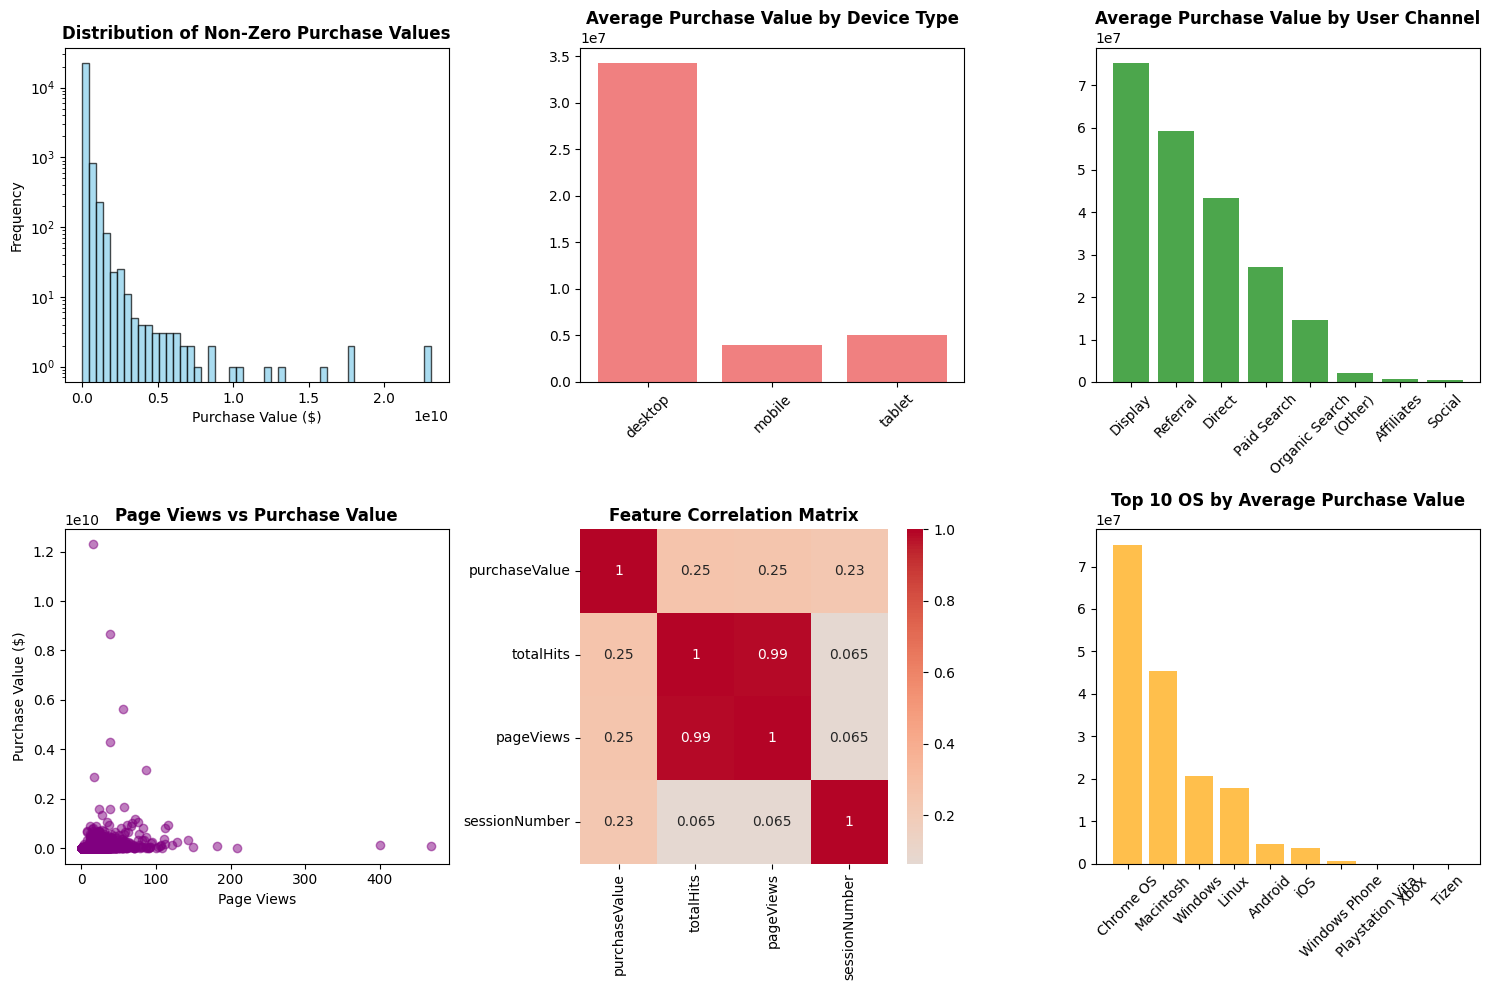


=== KEY INSIGHTS FROM VISUALIZATIONS ===
1. Purchase Distribution: Highly skewed with many zero-value sessions
2. Device Impact: Different devices show varying purchase patterns
3. Traffic Sources: Different channels have different conversion values
4. Engagement: Higher page views may correlate with higher purchase probability


In [14]:
print("=== CREATING DATA VISUALIZATIONS FOR INSIGHTS ===")

fig = plt.figure(figsize=(15, 10))

# Visualization 1: Purchase Value Distribution
plt.subplot(2, 3, 1)
purchase_values_non_zero = train_df[train_df['purchaseValue'] > 0]['purchaseValue']
plt.hist(purchase_values_non_zero, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Non-Zero Purchase Values', fontweight='bold')
plt.xlabel('Purchase Value ($)')
plt.ylabel('Frequency')
plt.yscale('log')

# Visualization 2: Purchase Value by Device Type
plt.subplot(2, 3, 2)
if 'deviceType' in train_df.columns:
    device_purchase = train_df.groupby('deviceType')['purchaseValue'].mean()
    plt.bar(device_purchase.index, device_purchase.values, color='lightcoral')
    plt.title('Average Purchase Value by Device Type', fontweight='bold')
    plt.xticks(rotation=45)

# Visualization 3: Purchase Value by User Channel
plt.subplot(2, 3, 3)
if 'userChannel' in train_df.columns:
    channel_purchase = train_df.groupby('userChannel')['purchaseValue'].mean().sort_values(ascending=False)
    plt.bar(range(len(channel_purchase)), channel_purchase.values, color='green', alpha=0.7)
    plt.title('Average Purchase Value by User Channel', fontweight='bold')
    plt.xticks(range(len(channel_purchase)), channel_purchase.index, rotation=45)

# Visualization 4: Page Views vs Purchase Value
plt.subplot(2, 3, 4)
if 'pageViews' in train_df.columns:
    sample_data = train_df.sample(n=min(5000, len(train_df)), random_state=42)
    plt.scatter(sample_data['pageViews'], sample_data['purchaseValue'], alpha=0.5, color='purple')
    plt.title('Page Views vs Purchase Value', fontweight='bold')
    plt.xlabel('Page Views')
    plt.ylabel('Purchase Value ($)')

# Visualization 5: Correlation Heatmap
plt.subplot(2, 3, 5)
correlation_features = [col for col in ['purchaseValue', 'totalHits', 'pageViews', 'sessionNumber'] 
                       if col in train_df.columns]
if len(correlation_features) > 1:
    correlation_matrix = train_df[correlation_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix', fontweight='bold')

# Visualization 6: Purchase Value by Operating System
plt.subplot(2, 3, 6)
if 'os' in train_df.columns:
    os_purchase = train_df.groupby('os')['purchaseValue'].mean().sort_values(ascending=False).head(10)
    plt.bar(range(len(os_purchase)), os_purchase.values, color='orange', alpha=0.7)
    plt.title('Top 10 OS by Average Purchase Value', fontweight='bold')
    plt.xticks(range(len(os_purchase)), os_purchase.index, rotation=45)

plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS FROM VISUALIZATIONS ===")
print("1. Purchase Distribution: Highly skewed with many zero-value sessions")
print("2. Device Impact: Different devices show varying purchase patterns")
print("3. Traffic Sources: Different channels have different conversion values")
print("4. Engagement: Higher page views may correlate with higher purchase probability")

##  Feature Engineering, Scaling and Encoding

In [15]:
# for col in ['browser', 'trafficSource', 'os', 'geoNetwork.subContinent', 'locationCountry']:
#     top_n = 10
#     top_categories = train_gc[col].value_counts().nlargest(top_n).index
#     train_gc[col] = train_gc[col].apply(
#         lambda x: x if pd.notna(x) and x in top_categories else 'Other'
#     )

# for col in ['browser', 'trafficSource', 'os', 'geoNetwork.subContinent', 'locationCountry']:
#     top_n = 10
#     top_categories = test_gc[col].value_counts().nlargest(top_n).index
#     test_gc[col] = test_gc[col].apply(
#         lambda x: x if pd.notna(x) and x in top_categories else 'Other'
#     )

# train_gc = train_gc.drop(categorical_cols, axis = 1)
# test_gc = test_gc.drop(categorical_cols , axis = 1)

In [16]:
# train_gc['date'] = pd.to_datetime(train_gc['date'], format='%Y%m%d')


# train_gc['month'] = train_gc['date'].dt.month
# train_gc['day'] = train_gc['date'].dt.day
# train_gc['dayofweek'] = train_gc['date'].dt.dayofweek        # Monday=0, Sunday=6
# train_gc['quarter'] = train_gc['date'].dt.quarter
# train_gc['is_weekend'] = train_gc['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# train_gc  = train_gc.drop(['date','day'], axis =1)



# test_gc['date'] = pd.to_datetime(test_gc['date'], format='%Y%m%d')


# test_gc['month'] = test_gc['date'].dt.month
# test_gc['day'] = test_gc['date'].dt.day
# test_gc['dayofweek'] = test_gc['date'].dt.dayofweek        # Monday=0, Sunday=6
# test_gc['quarter'] = test_gc['date'].dt.quarter
# test_gc['is_weekend'] = test_gc['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# test_gc = test_gc.drop(['date','day'], axis =1)

In [17]:
# print("=== FEATURE PREPROCESSING AND ENCODING ===")

# # Remove unnecessary columns
# columns_to_remove = ['sessionId', 'userId']
# for col in columns_to_remove:
#     if col in train_gc.columns:
#         train_fe = train_gc.drop(col, axis=1)
#     if col in test_gc.columns:
#         test_fe = test_gc.drop(col, axis=1)

# # Separate features and target
# X = train_gc.drop(['purchaseValue'], axis=1)
# y = train_gc['purchaseValue']

# # Ensure test data has same columns as training data (except target)
# X_test_final = test_gc.copy()
# if 'purchaseValue' in X_test_final.columns:
#     X_test_final = X_test_final.drop(['purchaseValue'], axis=1)

# # Align columns
# missing_cols = set(X.columns) - set(X_test_final.columns)
# extra_cols = set(X_test_final.columns) - set(X.columns)

# print(f"Missing columns in test: {missing_cols}")
# print(f"Extra columns in test: {extra_cols}")

# # Add missing columns with default values
# for col in missing_cols:
#     X_test_final[col] = 0

# # Remove extra columns
# for col in extra_cols:
#     if col in X_test_final.columns:
#         X_test_final = X_test_final.drop(col, axis=1)

# # Reorder columns to match
# X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# # X_test_final['month'] = X_test_final['date'].dt.month
# # X_test_final['day'] = X_test_final['date'].dt.day
# # X_test_final['weekday'] = X_test_final['date'].dt.weekday
# # X_test_final['dayofyear'] = X_test_final['date'].dt.dayofyear

# # # Now drop the original 'date'
# # X_test_final = X_test_final.drop(['date','day'], axis = 1)



# # Simple encoding for categorical features
# categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
# numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# print(f"Numerical features: {len(numerical_features)}")
# print(f"Categorical features: {len(categorical_features)}")

# # Label encode categorical features
# label_encoders = {}
# for col in categorical_features:
#     if col in X.columns:
#         le = LabelEncoder()
        
#         # Combine train and test for consistent encoding
#         combined_values = pd.concat([X[col], X_test_final[col]], axis=0).astype(str)
#         le.fit(combined_values)
        
#         # Transform both datasets
#         X[col] = le.transform(X[col].astype(str))
#         X_test_final[col] = le.transform(X_test_final[col].astype(str))
        
#         label_encoders[col] = le

# # Scale numerical features
# scaler = StandardScaler()
# if len(numerical_features) > 0:
#     X[numerical_features] = scaler.fit_transform(X[numerical_features])
#     X_test_final[numerical_features] = scaler.transform(X_test_final[numerical_features])

# print(f"\n PREPROCESSING COMPLETED:")
# print(f" Label encoding applied to {len(categorical_features)} categorical features")
# print(f" Standard scaling applied to {len(numerical_features)} numerical features")
# print(f" Final feature count: {X.shape[1]}")

# # Verify no missing values
# print(f"\nFinal verification:")
# print(f"Training data missing values: {X.isnull().sum().sum()}")
# print(f"Test data missing values: {X_test_final.isnull().sum().sum()}")
# print(f"Training data shape: {X.shape}")
# print(f"Test data shape: {X_test_final.shape}")

In [18]:
print("=== FEATURE PREPROCESSING===")

# Separate features and target
X = train_gc.drop(['purchaseValue'], axis=1)
y = train_gc['purchaseValue']

X_test_final = test_gc.copy()


numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {len(numerical_features)}")

# Scale numerical features
scaler = StandardScaler()
if len(numerical_features) > 0:
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
    X_test_final[numerical_features] = scaler.transform(X_test_final[numerical_features])


print(f"\n PREPROCESSING COMPLETED:")
print(f" Standard scaling applied to {len(numerical_features)} numerical features")
print(f" Final feature count: {X.shape[1]}")

# Verify no missing values
print(f"\nFinal verification:")
print(f"Training data missing values: {X.isnull().sum().sum()}")
print(f"Test data missing values: {X_test_final.isnull().sum().sum()}")
print(f"Training data shape: {X.shape}")
print(f"Test data shape: {X_test_final.shape}")

=== FEATURE PREPROCESSING===
Numerical features: 3

 PREPROCESSING COMPLETED:
 Standard scaling applied to 3 numerical features
 Final feature count: 3

Final verification:
Training data missing values: 0
Test data missing values: 0
Training data shape: (116015, 3)
Test data shape: (29006, 3)


## Prepare Data for Modeling

In [19]:
print("=== PREPARING DATA FOR MACHINE LEARNING ===")

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print(f"Test set: {X_test_final.shape[0]} samples")

# Analyze target distribution
print(f"\nTarget Variable Analysis:")
print(f"Training set - Zero purchases: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"Training set - Non-zero purchases: {(y_train > 0).sum()} ({(y_train > 0).mean()*100:.1f}%)")
print(f"Training set - Mean purchase value: ${y_train.mean():.2f}")
print(f"Training set - Median purchase value: ${y_train.median():.2f}")

=== PREPARING DATA FOR MACHINE LEARNING ===
Training set: 110214 samples
Validation set: 5801 samples
Features: 3
Test set: 29006 samples

Target Variable Analysis:
Training set - Zero purchases: 87443 (79.3%)
Training set - Non-zero purchases: 22771 (20.7%)
Training set - Mean purchase value: $26334239.84
Training set - Median purchase value: $0.00


## Model Building

In [20]:
print("=== BUILDING MULTIPLE MACHINE LEARNING MODELS ===")


models = {
    'xgboost_model': XGBRegressor(random_state=42,objective='reg:tweedie'),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear SVR': LinearSVR(random_state=42, max_iter=2000),  # Using LinearSVR
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate all models
model_results = {}
trained_models = {}

print(f"Training {len(models)} different models...")

for model_name, model in models.items():
    print(f"\n Training {model_name}...")
    
    try:
        # Train the model
        model.fit(X_train, y_train)
        trained_models[model_name] = model
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        val_r2 = r2_score(y_val, y_pred_val)
        val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        val_mae = mean_absolute_error(y_val, y_pred_val)
        
        # Store results
        model_results[model_name] = {
            'Train_R2': train_r2,
            'Validation_R2': val_r2,
            'RMSE': val_rmse,
            'MAE': val_mae,
            'Overfitting': train_r2 - val_r2
        }
        
        print(f"   Train R²: {train_r2:.4f}")
        print(f"   Validation R²: {val_r2:.4f}")
        print(f"   RMSE: ${val_rmse:.2f}")
        print(f"   MAE: ${val_mae:.2f}")
        
    except Exception as e:
        print(f"   Error training {model_name}: {str(e)}")

print(f"\n Successfully trained {len(model_results)} models!")


=== BUILDING MULTIPLE MACHINE LEARNING MODELS ===
Training 10 different models...

 Training xgboost_model...
   Train R²: 0.7223
   Validation R²: 0.7889
   RMSE: $128975340.78
   MAE: $25255850.35

 Training Linear Regression...
   Train R²: 0.1077
   Validation R²: 0.1087
   RMSE: $265003032.94
   MAE: $37436060.90

 Training Ridge Regression...
   Train R²: 0.1077
   Validation R²: 0.1087
   RMSE: $265003095.25
   MAE: $37435889.02

 Training Lasso Regression...
   Train R²: 0.1077
   Validation R²: 0.1087
   RMSE: $265003033.10
   MAE: $37436060.44

 Training Decision Tree...
   Train R²: 0.9692
   Validation R²: -0.4256
   RMSE: $335149700.54
   MAE: $23045581.50

 Training Random Forest...
   Train R²: 0.9043
   Validation R²: 0.6704
   RMSE: $161154894.72
   MAE: $23592413.26

 Training Extra Trees...
   Train R²: 0.9692
   Validation R²: 0.7925
   RMSE: $127878661.45
   MAE: $17766830.77

 Training Gradient Boosting...
   Train R²: 0.5729
   Validation R²: 0.6380
   RMSE: $168

## Hyperparameter Tuning

In [21]:
print("=== HYPERPARAMETER TUNING ===")

# Create results dataframe to identify top models
results_df = pd.DataFrame(model_results).T
top_models = results_df.nlargest(2, 'Validation_R2').index.tolist()

print(f"Top 2 models for tuning: {top_models}")

# Define parameter grids for ALL top models
param_grids = {
    'xgboost_model': {  
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    # 'Random Forest': {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [10, 20, None],
    #     'min_samples_split': [2, 5],
    #     'min_samples_leaf': [1, 2]
    # },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    # 'Gradient Boosting': {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.01, 0.1, 0.2],
    #     'max_depth': [3, 6, 10]
    # }
}

tuned_models = {}
tuning_results = {}

# Get models that have parameter grids defined
models_to_tune = [model for model in top_models if model in param_grids]
total_models = len(models_to_tune)

print(f"Tuning {total_models} models with defined parameter grids...")

# Perform hyperparameter tuning
for i, model_name in enumerate(models_to_tune):
    print(f"\n Tuning {model_name} ({i+1}/{total_models})...")
    
    # Get base model
    base_model = models[model_name]
    
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grids[model_name],
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=0
    )
    
    try:
        # Fit grid search
        grid_search.fit(X_train, y_train)
        
        # Store best model and results
        tuned_models[model_name] = grid_search.best_estimator_
        
        # Evaluate tuned model
        y_pred_val_tuned = grid_search.predict(X_val)
        tuned_r2 = r2_score(y_val, y_pred_val_tuned)
        tuned_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_tuned))
        
        tuning_results[model_name] = {
            'Best_Params': grid_search.best_params_,
            'Best_CV_Score': grid_search.best_score_,
            'Validation_R2': tuned_r2,
            'RMSE': tuned_rmse,
            'Improvement': tuned_r2 - model_results[model_name]['Validation_R2']
        }
        
        print(f"   Best parameters: {grid_search.best_params_}")
        print(f"   Best CV R² score: {grid_search.best_score_:.4f}")
        print(f"   Validation R²: {tuned_r2:.4f}")
        print(f"   Improvement: {tuning_results[model_name]['Improvement']:+.4f}")
        
    except Exception as e:
        print(f"   Error tuning {model_name}: {str(e)}")

print(f"\n Hyperparameter tuning completed for {len(tuning_results)} models!")


=== HYPERPARAMETER TUNING ===
Top 2 models for tuning: ['Extra Trees', 'xgboost_model']
Tuning 2 models with defined parameter grids...

 Tuning Extra Trees (1/2)...
   Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
   Best CV R² score: 0.2682
   Validation R²: 0.5537
   Improvement: -0.2388

 Tuning xgboost_model (2/2)...
   Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
   Best CV R² score: 0.3135
   Validation R²: 0.7525
   Improvement: -0.0364

 Hyperparameter tuning completed for 2 models!


## Model Performance Comparison

In [22]:
print("=== COMPREHENSIVE MODEL PERFORMANCE COMPARISON ===")

# Original models comparison
comparison_df = pd.DataFrame(model_results).T
comparison_df = comparison_df.round(4)

print("Original Models Performance:")
print("=" * 80)
print(comparison_df.sort_values('Validation_R2', ascending=False))

# Tuned models comparison
if tuning_results:
    print(f"\nTuned Models Performance:")
    print("=" * 50)
    
    for name, results in tuning_results.items():
        print(f"\n{name}_Tuned:")
        print(f"  Validation R²: {results['Validation_R2']:.4f}")
        print(f"  RMSE: ${results['RMSE']:.2f}")
        print(f"  Improvement: {results['Improvement']:+.4f}")

# Identify best model
best_model_name = comparison_df['Validation_R2'].idxmax()
best_model = trained_models[best_model_name]
best_r2 = comparison_df.loc[best_model_name, 'Validation_R2']

print(f"\n BEST PERFORMING MODEL: {best_model_name}")
print("=" * 35)
print(f" Best Validation R² Score: {best_r2:.4f}")
print(f" RMSE: ${comparison_df.loc[best_model_name, 'RMSE']:.2f}")
print(f" MAE: ${comparison_df.loc[best_model_name, 'MAE']:.2f}")

# Check if tuned version is better
if best_model_name in tuning_results:
    tuned_r2 = tuning_results[best_model_name]['Validation_R2']
    if tuned_r2 > best_r2:
        print(f" TUNED VERSION IS BETTER!")
        print(f" Tuned R² Score: {tuned_r2:.4f}")
        print(f" Improvement: {tuned_r2 - best_r2:.4f}")
        best_model = tuned_models[best_model_name]
        best_r2 = tuned_r2

=== COMPREHENSIVE MODEL PERFORMANCE COMPARISON ===
Original Models Performance:
                     Train_R2  Validation_R2          RMSE           MAE  \
Extra Trees            0.9692         0.7925  1.278787e+08  1.776683e+07   
xgboost_model          0.7223         0.7889  1.289753e+08  2.525585e+07   
Random Forest          0.9043         0.6704  1.611549e+08  2.359241e+07   
Gradient Boosting      0.5729         0.6380  1.688901e+08  3.028369e+07   
Linear Regression      0.1077         0.1087  2.650030e+08  3.743606e+07   
Ridge Regression       0.1077         0.1087  2.650031e+08  3.743589e+07   
Lasso Regression       0.1077         0.1087  2.650030e+08  3.743606e+07   
K-Nearest Neighbors    0.3988         0.0155  2.785164e+08  3.348152e+07   
Linear SVR            -0.0172        -0.0121  2.823955e+08  3.095922e+07   
Decision Tree          0.9692        -0.4256  3.351497e+08  2.304558e+07   

                     Overfitting  
Extra Trees               0.1767  
xgboost_model

## Final Predictions and Submission

In [23]:
print("=== GENERATING FINAL PREDICTIONS ===")

# X_test_final = X_test_final.drop(columns=['weekday', 'dayofyear'], errors='ignore')

#----------------
# from sklearn.impute import SimpleImputer

# # Fit once on train
# imputer = SimpleImputer(strategy='mean')
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# # Then ONLY transform test, and use same column order
# X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_train.columns)

# #-------------------

X_test_final = X_test_final[X_train.columns]



print(f"Best model: {best_model_name}")
print(f"Best R² Score: {best_r2:.4f}")

# Verify data alignment
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test_final.shape}")
print(f"Feature alignment: {list(X_train.columns) == list(X_test_final.columns)}")

# Make predictions using the best model
print("Making predictions on test data...")
final_predictions = best_model.predict(X_test_final)

# Ensure no negative predictions
final_predictions = np.maximum(final_predictions, 0)

# Create submission using sample submission template
submission = sample_submission.copy()
submission['purchaseValue'] = final_predictions[:len(submission)]  # Ensure correct length

# Prediction statistics
print(f"\n=== PREDICTION STATISTICS ===")
print(f"Number of predictions: {len(final_predictions)}")
print(f"Min predicted value: ${final_predictions.min():.2f}")
print(f"Max predicted value: ${final_predictions.max():.2f}")
print(f"Mean predicted value: ${final_predictions.mean():.2f}")
print(f"Median predicted value: ${np.median(final_predictions):.2f}")




# Rename the column
submission = submission.rename(columns={"ID": "id"})


# Save submission file
submission.to_csv('submission.csv', index=False)
print(f"\n Submission file saved as 'submission.csv'")

# Display sample predictions
print(f"\nFirst 10 predictions:")
print(submission.head(10))

# Final summary
print(f"\n=== FINAL MODEL SUMMARY ===")
print(f" Best Model: {best_model_name}")
print(f" Final R² Score: {best_r2:.4f}")
print(f" Total Features Used: {X_train.shape[1]}")
print(f" Training Samples: {X_train.shape[0]}")
print(f" Validation Samples: {X_val.shape[0]}")
print(f" Test Predictions: {len(final_predictions)}")

print(f"\n ENGAGE2VALUE: FROM CLICKS TO CONVERSIONS PROJECT COMPLETED SUCCESSFULLY! ")


=== GENERATING FINAL PREDICTIONS ===
Best model: Extra Trees
Best R² Score: 0.7925
Training data shape: (110214, 3)
Test data shape: (29006, 3)
Feature alignment: True
Making predictions on test data...

=== PREDICTION STATISTICS ===
Number of predictions: 29006
Min predicted value: $0.00
Max predicted value: $16023750000.00
Mean predicted value: $28152890.02
Median predicted value: $0.00

 Submission file saved as 'submission.csv'

First 10 predictions:
   id  purchaseValue
0   0   2.385667e+07
1   1   0.000000e+00
2   2   0.000000e+00
3   3   0.000000e+00
4   4   0.000000e+00
5   5   5.244400e+07
6   6   3.298600e+08
7   7   7.963300e+06
8   8   0.000000e+00
9   9   1.699000e+07

=== FINAL MODEL SUMMARY ===
 Best Model: Extra Trees
 Final R² Score: 0.7925
 Total Features Used: 3
 Training Samples: 110214
 Validation Samples: 5801
 Test Predictions: 29006

 ENGAGE2VALUE: FROM CLICKS TO CONVERSIONS PROJECT COMPLETED SUCCESSFULLY! 
